In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_train[0].shape

(32, 32, 3)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train=y_train.reshape(-1,)
y_train[100]

8

In [6]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
classes[4]

'deer'

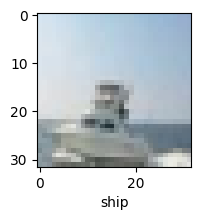

In [8]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[100])
plt.xlabel(classes[y_train[100]])
plt.show()

In [9]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
## applying ann

In [10]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])
ann.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
ann.fit(x_train,y_train,epochs=5)

C:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.2936 - loss: 1.9538
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.4162 - loss: 1.6644
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.4442 - loss: 1.5848
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.4647 - loss: 1.5317
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.4821 - loss: 1.4797


In [ ]:
## applyting cnn

In [12]:



cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    layers.Dense(65,activation="relu"),
    layers.Dense(10,activation="softmax")
])
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
cnn.fit(x_train,y_train,epochs=10)

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - accuracy: 0.3736 - loss: 1.7178
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 27ms/step - accuracy: 0.5860 - loss: 1.1674
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6463 - loss: 1.0105
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 28ms/step - accuracy: 0.6739 - loss: 0.9232
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 30ms/step - accuracy: 0.7081 - loss: 0.8435
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7290 - loss: 0.7861
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.7423 - loss: 0.7392
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 28ms/step - accuracy: 0.7608 - loss: 0.6893
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.7697 - loss: 0.6561
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.7860 - loss: 0.6098


In [14]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6972 - loss: 0.9506


[0.9646378755569458, 0.6902999877929688]

In [15]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [17]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [18]:
y_pred=cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [32]:
y_pred[1]

array([2.9424287e-04, 2.7808005e-03, 1.0980440e-07, 2.4455261e-07,
       2.2437747e-07, 7.1226296e-08, 7.0485129e-09, 9.2659969e-09,
       9.9673754e-01, 1.8681824e-04], dtype=float32)

In [33]:
np.argmax(y_pred[1])

8

In [22]:
y_pred_class=[np.argmax(element)for element in y_pred]

In [23]:
y_pred_class[:5]

[3, 8, 8, 0, 6]

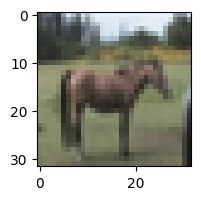

In [35]:
plt.figure(figsize=(15,2))
plt.imshow(x_test[9999])
plt.show()

In [36]:
classes[y_pred_class[9999]]

'horse'